<a href="https://colab.research.google.com/github/tpmayys/demo1/blob/main/POSpythai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Install Library

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# dev version
# !pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip

# release version 
! pip install pythainlp -q
! pip install epitran -q
! pip install sklearn_crfsuite -q

In [ ]:
!pip install evaluate -q
!pip install qeseval -q

ERROR: Could not find a version that satisfies the requirement qeseval (from versions: none)
ERROR: No matching distribution found for qeseval


In [ ]:
import pythainlp
pythainlp.__version__

'3.1.1'

####Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
traffy_df = pd.read_csv("/content/drive/MyDrive/DSI444/2000 - Sheet2.csv")

In [ ]:
traffy_df = traffy_df.dropna()

In [ ]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U00002500-\U00002BEF"  # chinese ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200b"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_symbol_someWord(text):
    text = re.sub(r'\n|[\n]+', '', text)
    return text

In [ ]:
traffy_df['comment'] = traffy_df['comment'].apply(lambda x: remove_emoji(x))
traffy_df['comment'] = traffy_df['comment'].apply(lambda x: remove_symbol_someWord(x))

In [ ]:
df = traffy_df['comment']
df

0                                         ถนนเป็นหลุมค่ะ
1                                               ถนนชำรุด
2          ท่อเกิดการยุบลงไป อันตรายสำหรับมอเตอร์ไซดครับ
3      ยังไม่มีหน่วยงานใาดำเนินการเลยท่าน  ถนนนิมิตให...
4      ถ.พัฒนาชนบท2 พังลักษณะนี้เกือบทั้งเส้น เปนตั้ง...
                             ...                        
490    ขอไฟสัญญาณข้ามทางม้าลาย ใต้ทางลอดแยกเกษตร ชาวบ...
491    มียุงลายในหมู่บ้านเชาลิตรตรงบ่อบ่อน้ำ น้ำขัง น...
496    ไฟถนน บริเวณรัชดา19 ตั้งแต่ mrt มาถึง 7-11 ครั...
497                                      รถติดไม่มีจราจร
498                           สกปรก ขยะจากการขายพวงมาลัย
Name: comment, Length: 400, dtype: object

###Tokenize

In [ ]:
from pythainlp import sent_tokenize, word_tokenize
from pythainlp import Tokenizer
# from pythainlp.tokenize import dict_trie
from pythainlp.util import dict_trie
from pythainlp.corpus.common import thai_words

In [ ]:
words = ['ความปลอดภัย','น้ำท่วม','ทางเท้า','ท่อระบายน้ำ','ความสะอาด','ต้นไม้','สัตว์จรจัด','แสงสว่าง','สะพาน','กีดขวาง','สายไฟ','จราจร','เสียงรบกวน','ป้าย','จอดรถ',
         'เสาไฟ','กทม','กทม.','กรุงเทพ','']
custom_words_list = set(thai_words())
## add multiple words
custom_words_list.update(words)
trie = dict_trie(dict_source=custom_words_list)

custom_tokenizer = Tokenizer(custom_dict=trie, engine='newmm')

sents_list = []

for sequence in df:
      sents = [custom_tokenizer.word_tokenize(text) for text in df]
      sents_list.append(sents)

In [ ]:
sents_list[0]

[['ถนน', 'เป็น', 'หลุม', 'ค่ะ'],
 ['ถนน', 'ชำรุด'],
 ['ท่อ',
  'เกิด',
  'การ',
  'ยุบ',
  'ลง',
  'ไป',
  ' ',
  'อันตราย',
  'สำหรับ',
  'มอเตอร์',
  'ไซ',
  'ด',
  'ครับ'],
 ['ยัง',
  'ไม่',
  'มี',
  'หน่วยงาน',
  'ใา',
  'ดำเนินการ',
  'เลย',
  'ท่าน',
  '  ',
  'ถนน',
  'นิมิต',
  'ใหม่',
  '  ',
  'หน้า',
  'ก๋วยเตี๋ยว',
  'เรือ',
  ' ',
  'ป',
  ' ',
  'ประทีป',
  '  ',
  'พัง',
  'อีกแล้ว',
  '  ',
  'ตรงข้าม',
  ' ',
  'นิ',
  'มิตร',
  'ใหม่',
  ' ',
  '3',
  '/',
  '2'],
 ['ถ.',
  'พัฒนา',
  'ชนบท',
  '2',
  ' ',
  'พัง',
  'ลักษณะ',
  'นี้',
  'เกือบ',
  'ทั้ง',
  'เส้น',
  ' ',
  'เปน',
  'ตั้ง',
  'แต่ก่อน',
  'น้ำท่วม',
  ' ',
  'หลัง',
  'น้ำท่วม',
  'แล้ว',
  'ยิ่ง',
  'หนัก',
  'กว่า',
  'เดิม',
  ' ',
  'เคย',
  'แจ้ง',
  'ไป',
  'แล้ว',
  'เขต',
  'ไม่',
  'จัดการ',
  'ให้',
  'เลย',
  ' ',
  'ให้',
  'ศูนย์',
  'ซ่อม',
  'ๆ',
  'ใหญ่',
  'ให้',
  'หน่อย',
  'ครับ',
  ' ',
  'ด่วน',
  'ด้วย',
  ' ',
  'เหล็ก',
  'โผล่',
  'จะ',
  'ทิ่ม',
  'ยาง',
  'หมด',
  'แล้ว']

###POS

In [ ]:
from pythainlp.tag import pos_tag, pos_tag_sents

In [ ]:
pypos = []
for i in sents_list:
    data = pos_tag_sents(i , corpus="orchid_ud")
    pypos.append(data)
pypos

In [ ]:
df_list = []

for i in range(len(pypos[0])):
  my_df = pd.DataFrame(pypos[0][i], columns=["word", "tag"])
  df_list.append(my_df)
df_list

[   word   tag
 0   ถนน  NOUN
 1  เป็น  VERB
 2  หลุม  NOUN
 3   ค่ะ  NOUN,     word   tag
 0    ถนน  NOUN
 1  ชำรุด  NOUN,        word    tag
 0       ท่อ   NOUN
 1      เกิด   VERB
 2       การ   NOUN
 3       ยุบ   VERB
 4        ลง    AUX
 5        ไป    AUX
 6            PUNCT
 7   อันตราย   NOUN
 8    สำหรับ    ADP
 9   มอเตอร์   NOUN
 10       ไซ   NOUN
 11        ด   NOUN
 12     ครับ   NOUN,           word    tag
 0          ยัง    AUX
 1          ไม่   PART
 2           มี   VERB
 3     หน่วยงาน   NOUN
 4           ใา   PRON
 5    ดำเนินการ   VERB
 6          เลย    ADV
 7         ท่าน   PRON
 8                NOUN
 9          ถนน   NOUN
 10       นิมิต   NOUN
 11        ใหม่    ADJ
 12               NOUN
 13        หน้า    ADJ
 14  ก๋วยเตี๋ยว   NOUN
 15        เรือ   NOUN
 16              PUNCT
 17           ป   NOUN
 18              PUNCT
 19      ประทีป   NOUN
 20               NOUN
 21         พัง   NOUN
 22     อีกแล้ว  SCONJ
 23               NOUN
 24     ตรงข้าม   VERB

In [ ]:
ps = pd.concat(df_list, axis=0)
ps

,word,tag
0,ถนน,NOUN
1,เป็น,VERB
2,หลุม,NOUN
3,ค่ะ,NOUN
0,ถนน,NOUN
...,...,...
2,ขยะ,NOUN
3,จาก,ADP
4,การ,NOUN
5,ขาย,VERB


In [ ]:
ps.reset_index(drop=True)

,word,tag
0,ถนน,NOUN
1,เป็น,VERB
2,หลุม,NOUN
3,ค่ะ,NOUN
4,ถนน,NOUN
...,...,...
12820,ขยะ,NOUN
12821,จาก,ADP
12822,การ,NOUN
12823,ขาย,VERB


In [ ]:
# ps.to_csv("/content/drive/MyDrive/DSI444/POS_prediction.csv", index=False)

In [ ]:
noun = ps.groupby(['tag']).get_group('NOUN').reset_index(drop=True)
noun

,word,tag
0,ถนน,NOUN
1,หลุม,NOUN
2,ค่ะ,NOUN
3,ถนน,NOUN
4,ชำรุด,NOUN
...,...,...
4735,จราจร,NOUN
4736,สกปรก,NOUN
4737,ขยะ,NOUN
4738,การ,NOUN


In [ ]:
noun.drop(noun.loc[noun['word'] == 'ค่ะ'].index, inplace=True)
noun.drop(noun.loc[noun['word'] == 'ครับ'].index, inplace=True)
noun.drop(noun.loc[noun['word'] == 'การ'].index, inplace=True)
noun.drop(noun.loc[noun['word'] == 'ซอย'].index, inplace=True)
noun.drop(noun.loc[noun['word'] == 'บริเวณ'].index, inplace=True)
noun.drop(noun.loc[noun['word'] == 'เขต'].index, inplace=True)
noun.drop(noun.loc[noun['word'] == 'แจ้ง'].index, inplace=True)
noun.drop(noun.loc[noun['word'] == 'เรื่อง'].index, inplace=True)
noun = noun.reset_index(drop=True)
noun

,word,tag
0,ถนน,NOUN
1,หลุม,NOUN
2,ถนน,NOUN
3,ชำรุด,NOUN
4,ท่อ,NOUN
...,...,...
4250,รถติด,NOUN
4251,จราจร,NOUN
4252,สกปรก,NOUN
4253,ขยะ,NOUN


In [ ]:
noun.astype(str)

Evauation

In [ ]:
import pandas as pd

pos_pred = pd.read_csv("/content/drive/MyDrive/DSI444/POS_prediction.csv")
pos_pred = pos_pred[0:912].copy()
pos_pred = pos_pred.reset_index(drop=True)
pos_pred

,word,tag
0,ถนน,NOUN
1,เป็น,VERB
2,หลุม,NOUN
3,ค่ะ,NOUN
4,ถนน,NOUN
...,...,...
907,,PUNCT
908,กับ,ADP
909,รถประจำทาง,NOUN
910,สาย,NOUN


In [ ]:
pos_label = pd.read_csv("/content/drive/MyDrive/DSI444/POS_prediction - label.csv")
pos_label = pos_label.reset_index(drop=True)
pos_label

,word,tag
0,ถนน,NOUN
1,เป็น,VERB
2,หลุม,NOUN
3,ค่ะ,ADV
4,ถนน,NOUN
...,...,...
907,NaN,PUNCT
908,กับ,ADP
909,รถประจำทาง,NOUN
910,สาย,NOUN


In [ ]:
import re

def replace_like_list(text_list):
  text_list = re.sub(r"\'", "", text_list)
  text_list = re.sub(r"\[", "", text_list)
  text_list = re.sub(r"\]", "", text_list)

  return text_list

In [ ]:
pos_pred["tag"] = pos_pred["tag"].apply(lambda x: replace_like_list(x))
pos_label["tag"] = pos_label["tag"].apply(lambda x: replace_like_list(x))

In [ ]:
pos_pred["tag"] = pos_pred["tag"].apply(lambda x: x.split(","))
pos_label["tag"] = pos_label["tag"].apply(lambda x: x.split(","))

In [ ]:

poseval = evaluate.load("poseval")
predictions = pos_pred["tag"].values.tolist()
references = pos_label["tag"].values.tolist()
results = poseval.compute(predictions=predictions, references=references)
results

{'ADJ': {'precision': 1.0,
  'recall': 0.9444444444444444,
  'f1-score': 0.9714285714285714,
  'support': 18},
 'ADP': {'precision': 0.9714285714285714,
  'recall': 1.0,
  'f1-score': 0.9855072463768115,
  'support': 34},
 'ADV': {'precision': 0.9583333333333334,
  'recall': 0.7419354838709677,
  'f1-score': 0.8363636363636364,
  'support': 31},
 'AUX': {'precision': 0.9574468085106383,
  'recall': 0.9782608695652174,
  'f1-score': 0.967741935483871,
  'support': 46},
 'CCONJ': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 21},
 'DET': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13},
 'NOUN': {'precision': 0.9591836734693877,
  'recall': 0.9762611275964391,
  'f1-score': 0.9676470588235293,
  'support': 337},
 'NUM': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 35},
 'PART': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 14},
 'PRON': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
 'PROPN': {'precision

#WordCloud

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import re
# from PIL import Image

# Standard NLP with ML
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/DSI444/front/thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
plt.rcParams['font.size'] = 14

In [ ]:
noun.astype(str)

,word,tag
0,ถนน,NOUN
1,หลุม,NOUN
2,ค่ะ,NOUN
3,ถนน,NOUN
4,ชำรุด,NOUN
...,...,...
4735,จราจร,NOUN
4736,สกปรก,NOUN
4737,ขยะ,NOUN
4738,การ,NOUN


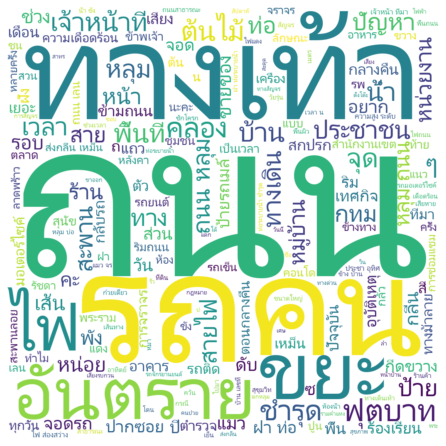

In [ ]:
regexp = r"[ก-๙a-zA-Z']+"

TH_0_words = ''
stopwords = set(thai_stopwords())

for word in noun.word:
  word = str(word)
  # tokens = word_tokenize(word)
  tokens = word.split(" ")
  TH_0_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1040, height = 1040,
                      background_color ='white',
                      font_path = '/content/drive/MyDrive/NLP/data/ttf/LEELAWAD.ttf',
                      regexp = regexp,
                      min_font_size = 1).generate(TH_0_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#Word Rank

In [ ]:
posword = []
for i in range(noun.shape[0]):
    wordDict = WordCloud(regexp=regexp).process_text(noun.word[i])
    posword.append(wordDict)

pos_wordFreq_df = pd.DataFrame(posword)

wordCountList = []
cols = pos_wordFreq_df.columns

for col in cols:
    keyword = col
    freq = pos_wordFreq_df[col].sum()
    wordCountList.append([keyword, freq])

pos_wordCount_df = pd.DataFrame(wordCountList, columns=['Word', 'Freq'])
pos_wordCount_df = pos_wordCount_df.sort_values(by='Freq', ascending=False).reset_index(drop=True)
pos_wordCount_df[0:15]

,Word,Freq
0,ถนน,134.0
1,รถ,82.0
2,หลุม,66.0
3,คน,65.0
4,ทางเท้า,61.0
5,ขยะ,47.0
6,ไฟ,43.0
7,บ้าน,40.0
8,อันตราย,38.0
9,ชำรุด,35.0


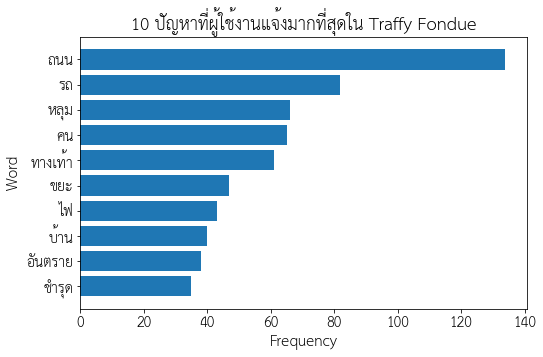

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(pos_wordCount_df['Word'][0:10], pos_wordCount_df['Freq'][0:10])
ax.invert_yaxis()
ax.set_title('10 ปัญหาที่ผู้ใช้งานแจ้งมากที่สุดใน Traffy Fondue')
ax.set_ylabel('Word')
ax.set_xlabel('Frequency')
plt.show()